<center><font size = 5><b><i>Assignment2</i></b></font></center>
<div style="text-align: right"><i>By Yi Zhou</i></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mltools as ml
data = np.genfromtxt("data/curve80.txt",delimiter=None) # load the text file
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it's 2-dimensional
Y = data[:,1]
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

## Problem 1
### Question 1.1

In [2]:
print "Shape of Xtr: " , Xtr.shape
print "Shape of Xte: " , Xte.shape
print "Shape of Ytr: " , Ytr.shape
print "Shape of Yte: " , Yte.shape

Shape of Xtr:  (60, 1)
Shape of Xte:  (20, 1)
Shape of Ytr:  (60,)
Shape of Yte:  (20,)


In [3]:
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200)# densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code)
ys = lr.predict( xs ) # make predictions at xs

### Question 1.2 (a)

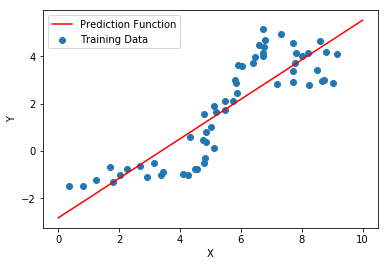

In [4]:
%matplotlib inline
plt.scatter(Xtr,Ytr,label = "Training Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xs,ys,color='red',label = "Prediction Function")
plt.legend()

### Question 1.2 (b)

In [5]:
print lr.theta
print "Obviously, the intercept and the slope match my plot, so the regression coeffiencies match my plot well"

[[-2.82765049  0.83606916]]
Obviously, the intercept and the slope match my plot, so the regression coeffiencies match my plot well


### Question 1.2 (c)

In [6]:
print "The mean sqaured error on training data is: ", lr.mse(X=Xtr,Y=Ytr)
print "The mean squared error on test data is: ", lr.mse(X=Xte,Y=Yte)

The mean sqaured error on training data is:  1.12771195561
The mean squared error on test data is:  2.24234920301


### Question 1.3 (a)

In [7]:
def add_poly_features(Xtr,Xte,Ytr,degree = 1):
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    # Rescale the data matrix so that the features have similar ranges / variance
    XtrP,params = ml.transforms.rescale(XtrP)
    # "params" returns the transformation parameters (shift & scale)
    # Then we can train the model on the scaled feature matrix:
    lr = ml.linear.linearRegress( XtrP, Ytr ) # create and train model
    # Now, apply the same polynomial expansion & scaling transformation to Xtest:
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,False), params)
    return XtrP, XteP, lr

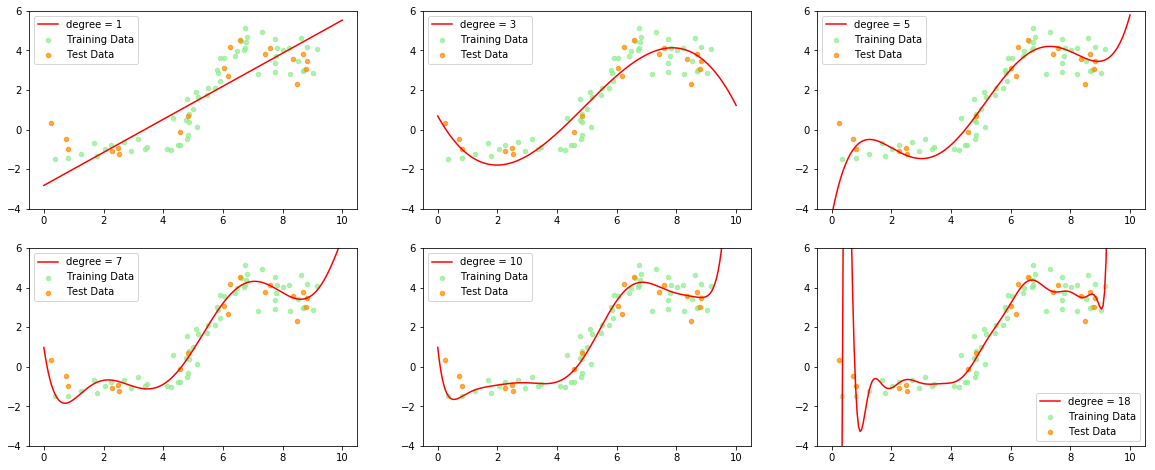

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(20, 8)) # Create axes for single subplot ax.plot(...) 
ax = ax.ravel()
degree = [1,3,5,7,10,18]
for i in range(0,6):
    _,xsp,lr = add_poly_features(Xtr,xs,Ytr,degree[i])
    ysp = lr.predict(xsp)
    ax[i].plot(xs,ysp,label="degree = "+str(degree[i]),color='red')
    ax[i].scatter(Xtr, Ytr, s=20, color='lightgreen', \
               alpha=0.75, label='Training Data')
    ax[i].scatter(Xte, Yte, s=20, color='darkorange', \
               alpha=0.75, label='Test Data')
    ax[i].set_ylim(-4, 6) # Set the minimum and maximum limits
    ax[i].legend()

### Question 1.3 (b)

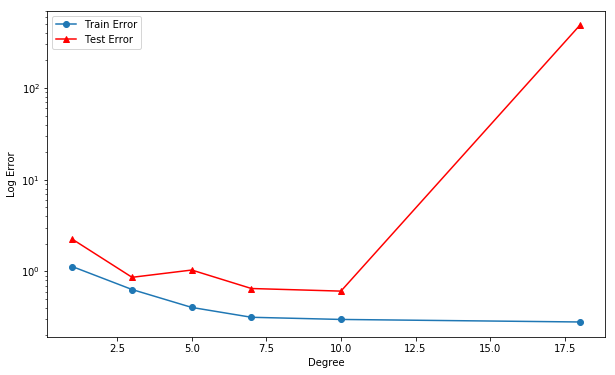

In [32]:
train_err = []
test_err = []
for i in range(0,6):
    XtrP,XteP,lr = add_poly_features(Xtr,Xte,Ytr,degree[i])
    train_err.append(lr.mse(X=XtrP,Y=Ytr))
    test_err.append(lr.mse(X=XteP,Y=Yte))
plt.figure(figsize=(10,6))
plt.semilogy(degree,train_err,label="Train Error",marker='o')
plt.semilogy(degree,test_err,color='red',label="Test Error",marker='^')
plt.xlabel("Degree")
plt.ylabel("Log Error")
plt.legend()

### Question 1.3 (c)
According to the plot above, I would like to recommend degree = 10 

## Problem 2
### Question 2.1

In [22]:
def cross_validation(Xtr,Ytr,degree = 1,nFolds = 5):
    J = []
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    # Rescale the data matrix so that the features have similar ranges / variance
    XtrP,params = ml.transforms.rescale(XtrP)
    #Do cross validation
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(XtrP,Ytr,nFolds,iFold)
        learner = ml.linear.linearRegress(Xti,Yti)
        J.append(learner.mse(Xvi,Yvi))
    return np.mean(J)

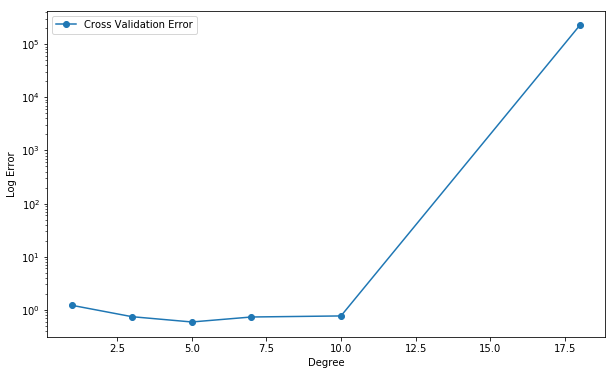

In [25]:
cross_validation_err = []
for i in range(0,6):
    cross_validation_err.append(cross_validation(Xtr,Ytr,degree[i],5))
plt.figure(figsize=(10,6))
plt.semilogy(degree,cross_validation_err,label="Cross Validation Error",marker='o')
plt.xlabel("Degree")
plt.ylabel("Log Error")
plt.legend()

### Problem 2.2
They share the same trend, but there are also some obvious differences between them. When degree = 5 cross validation has the minimum error while actual test data has the minimum error when degree = 10. When degree > 10, the five-fold cross-validation error increased much faster than that of the actual test data as degree increases. 

### Problem 2.3
I will recommend degree = 5 based on five-fold cross-validation error, because when degree = 5 it has the smallest error value.

### Problem 2.4

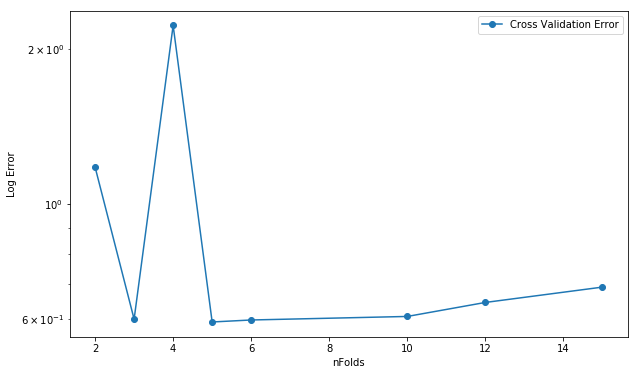

In [35]:
nFolds = [2, 3, 4, 5, 6, 10, 12, 15]
nFolds_err = []
for i in range(len(nFolds)):
    #Set degree = 5
    nFolds_err.append(cross_validation(Xtr,Ytr,5,nFolds[i]))
plt.figure(figsize=(10,6))
plt.semilogy(nFolds,nFolds_err,label="Cross Validation Error",marker='o')
plt.xlabel("nFolds")
plt.ylabel("Log Error")
plt.legend()

Pattern: When nFolds = 3, there is a fierce decrease in MSE, however when nFolds = 4, there is a fierce increase in MSE and when nFolds = 5 MSE decreases suddenly. We can conclude that there is a vibration on MSE when nFolds <= 5, after that MSE increase slowly.
<p>Explainnation: It might be because when nFolds are too small, train set is not big enough and validation set is too big, which might cause underfitting. When nFolds getting bigger, train set also becomes bigger and that might cause overfitting which is the reason for the growing MSE when Nfolds is bigger than 5. The unusual error when nFolds = 4  is probably caused by that 1/4 of our data happens to be very different from the rest.

## Problem 3 Statement of Collaboration
I finish all things above by myself without exchanging ideas with any other person.